In [1]:
#  IMPORT THE NECESSARY LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset

df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking shape of the Dataset

df.shape

(891, 12)

In [6]:
# 'Cabin' feature have maximum null_value so we drop it

df.drop('Cabin',axis=1, inplace=True)

In [7]:
# drop the 'PassengerID' ,'Ticket', 'Name',  these are unimportant features  

df.drop(['PassengerId','Ticket','Name'], axis=1, inplace=True)


In [9]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [10]:
df.shape

(891, 8)

In [11]:
# checking  null value in DataFrame

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
# impute null value in 'Age ' 

df['Age'].fillna(df.groupby(['Sex'])['Age'].transform('mean'), inplace=True)

In [13]:
#
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [14]:
df['Embarked'].fillna('S', inplace=True)

#  'S' is mode value of this feature

In [15]:
# checking again null-value
df[['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

In [16]:
# brief summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
# descriptive information about Dataset

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


male      577
female    314
Name: Sex, dtype: int64


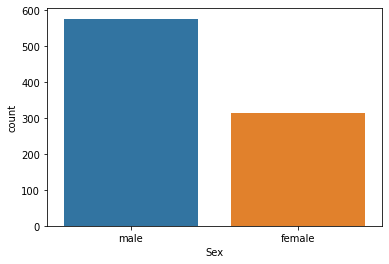

In [18]:
# counting 'Sex' Feature value

print(df['Sex'].value_counts())

sns.countplot(df['Sex'])
plt.show()

0    549
1    342
Name: Survived, dtype: int64


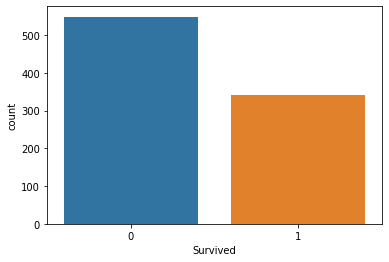

In [19]:
# 

print(df['Survived'].value_counts())

sns.countplot(df['Survived'])
plt.show()                               # dataset is balanced

S    646
C    168
Q     77
Name: Embarked, dtype: int64


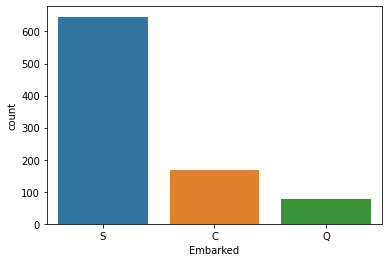

In [21]:
# counting the 'Embarked' feature value

print(df['Embarked'].value_counts())

sns.countplot(df['Embarked'])
plt.show()

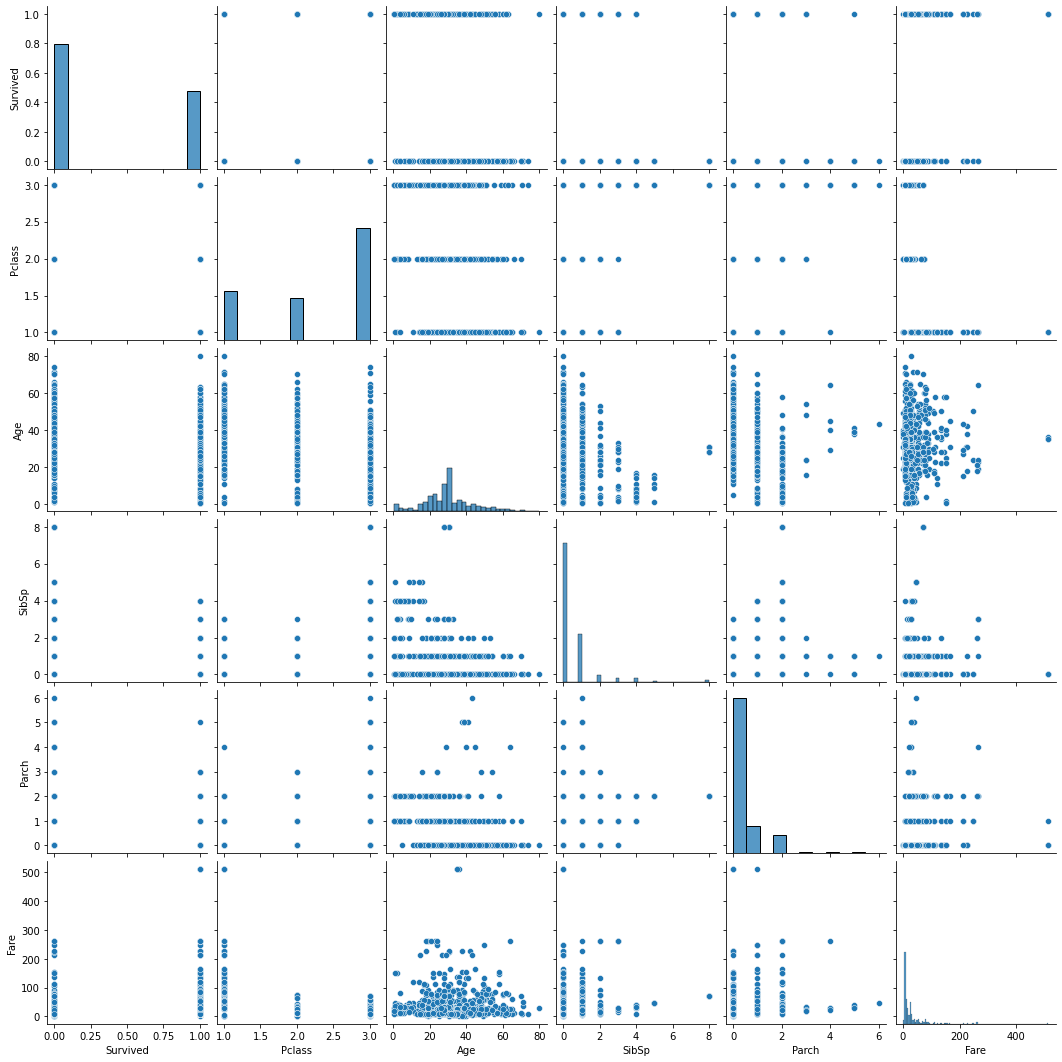

In [22]:
# plotting pairplot
sns.pairplot(df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

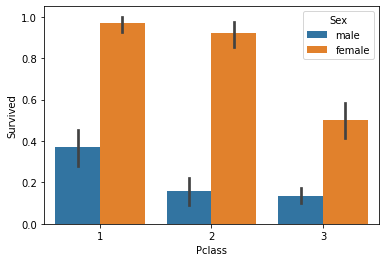

In [23]:
# we plotting barplot

sns.barplot('Pclass', 'Survived', data=df, hue='Sex')

# we seen in this barplot female in pclass-1, pclass-2, survival probability rate is high

# male survival rate is ver low means almost all are died

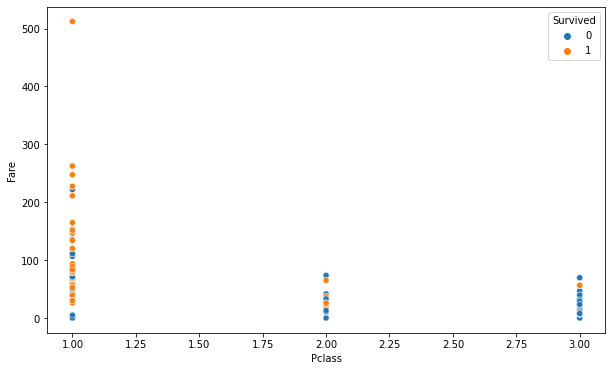

In [24]:
# plotting scatterplot 'Pclass', 'Survived', 

plt.figure(figsize=(10,6))
sns.scatterplot('Pclass', 'Fare', data=df, hue='Survived')
plt.show()

# in this scatterplot we seen relation between 'Pclass' and 'Survived' , 
#   person who live Pclass-1 survival rate is very high

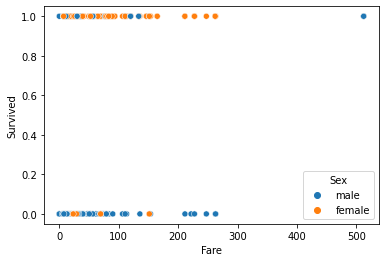

In [25]:

sns.scatterplot('Fare', 'Survived', data=df, hue='Sex')
plt.show()

#  'Fare' feature is not much importance to given any information about 'survived'(died / live) 
#  in titanic ship most 'female ' survived

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

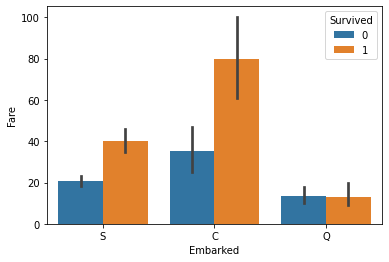

In [26]:
# 

sns.barplot('Embarked','Fare', data=df, hue='Survived')

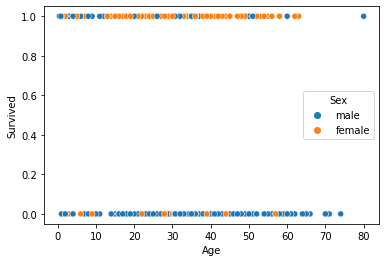

In [27]:
sns.scatterplot('Age', 'Survived', data= df, hue='Sex')
plt.show()

In [26]:
# we seen in above graph 'Female' survived rate is high caompare to 'Male' 
#    'Age' feature is no matter to survival rate

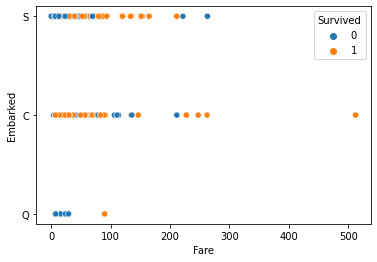

In [28]:
#
sns.scatterplot('Fare', 'Embarked', data=df,hue='Survived')
plt.show()
# passenger who related 'Embarked-C' those survival rate is high 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

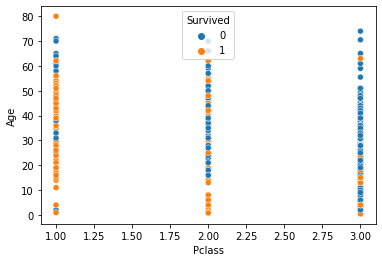

In [29]:
sns.scatterplot('Pclass', 'Age', data=df,hue= 'Survived')

In [29]:
# In above graph we seen passsenger who sit 'Pclass 1' those survived
# passenger who sit in 'pclass_2' and passenger_Age was less those mostly survived

# person who sit in pclass_2  some surviived
# person who sit in pclass_3 mostly died 

# 'Embarked' feature also important to target_vriable


<AxesSubplot:>

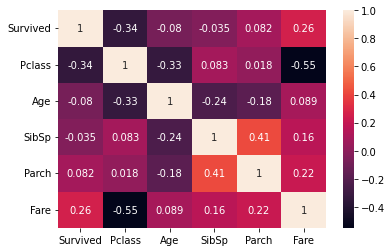

In [30]:
# plotting heatmap of dataset correlation 

sns.heatmap(df.corr(), annot=True)

# no any correlation between features and target_variable

In [31]:
# 

df['Embarked']= df['Embarked'].replace({'C':0,'S':1,'Q':2})

df['Sex']= df['Sex'].replace({'male':1,'female':0})

In [32]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1


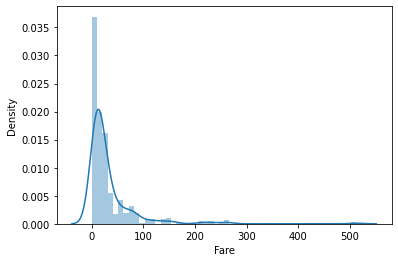

In [34]:
# checking 'Fare' distribution

sns.distplot(df['Fare'])
plt.show()


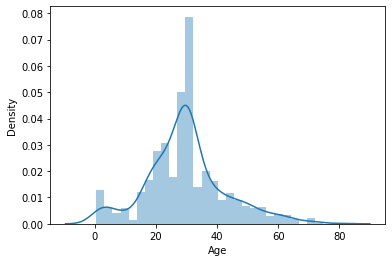

In [33]:
# checking 'Age' distribution

sns.distplot(df['Age'])
plt.show()

# most of passenger age in 20 to 50 range

In [35]:
# checking outliers
from scipy.stats import zscore

(np.abs(zscore(df[['Age','Fare']]))<3).all()


Age     False
Fare    False
dtype: bool

In [36]:
# OUTLIER removing  with Z_SCORE METHOD

from scipy.stats import zscore

z_scores=zscore(df[['Age','Fare']])
X_new= df.loc[(abs(z_scores)<3).all(axis=1)]

In [37]:
print('original_shape=', df.shape)
print('shape after removing outliers',X_new.shape)

original_shape= (891, 8)
shape after removing outliers (864, 8)


In [38]:
# checking skewness  over continuous features

X_new[['Age','Fare']].skew()      

Age     0.229679
Fare    2.257178
dtype: float64

In [39]:
# removing skewness

X_new['Fare']= np.log1p(X_new['Fare'])

In [40]:
X_new['Fare'].skew()

0.11346800155851679

In [41]:
# input variable 
x= X_new.drop(['Survived','Parch'], axis=1)

# target_variable
y= X_new.Survived

In [42]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

scaled= sc.fit_transform(x)         # scaling the input data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [44]:
# let's use LogisticRegression

# IN TRAINING PROCESS          # finding best random_state 

from sklearn.linear_model import LogisticRegression

max_acu= 0
max_rs= 0
for r_state in range(50,300):
    x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.20,stratify=y )
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)



maximum accuracy : 0.838150289017341  random_state is : 50
maximum accuracy : 0.8497109826589595  random_state is : 77
maximum accuracy : 0.8554913294797688  random_state is : 92


In [45]:
#
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=5, shuffle=True, random_state=459)


def model_score(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(ytrain,pred))
        
    print('test_accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred))
    print('confusion_matrix \n', confusion_matrix(y_test,y_pred))


def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [46]:
 
# lets use LOGISTIC REGRESSION
                   # we check above random_state = 138 is best for splitting
x_train,x_testl,y_train,y_testl =train_test_split(scaled, y,random_state = 92,test_size=0.20,stratify=y)

lr = LogisticRegression()

model_score(lr,x_train,y_train,x_testl,y_testl)

training_score = 0.7814761215629522
test_accuracy_score= 0.8554913294797688
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       108
           1       0.78      0.86      0.82        65

    accuracy                           0.86       173
   macro avg       0.84      0.86      0.85       173
weighted avg       0.86      0.86      0.86       173

confusion_matrix 
 [[92 16]
 [ 9 56]]


In [47]:
#
                  # IN TRAINING PROCESS           # finding best random_state for  ADABOOST
from sklearn.ensemble import AdaBoostClassifier

max_acu= 0
max_rs= 0
for r_state in range(50,300):
    x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.20 )
    adb = AdaBoostClassifier(n_estimators=150,learning_rate=0.3)
    adb.fit(x_train,y_train)
    y_pred=adb.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.8439306358381503  random_state is : 50
maximum accuracy : 0.8554913294797688  random_state is : 111
maximum accuracy : 0.861271676300578  random_state is : 138
maximum accuracy : 0.8670520231213873  random_state is : 267


In [48]:
 # lets use AdaBoost CLASSIFICATION

# we check above random_state = 267 is best for splitting
from sklearn.ensemble import AdaBoostClassifier
x_train,x_testA,y_train,y_testA = train_test_split(scaled, y,random_state = 267,test_size=0.20)

ad = AdaBoostClassifier()
model_score(ad,x_train,y_train,x_testA,y_testA)

training_score = 0.8277858176555717
test_accuracy_score= 0.8728323699421965
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       103
           1       0.86      0.81      0.84        70

    accuracy                           0.87       173
   macro avg       0.87      0.86      0.87       173
weighted avg       0.87      0.87      0.87       173

confusion_matrix 
 [[94  9]
 [13 57]]


In [51]:
# IN TRAINING PROCESS               # finding best random_state

from sklearn.svm import SVC

max_acu= 0
max_rs= 0
for r_state in range(50,300):
    x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.20 )
    svm = SVC()
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.8728323699421965  random_state is : 50
maximum accuracy : 0.884393063583815  random_state is : 110
maximum accuracy : 0.9190751445086706  random_state is : 111


In [52]:
 # lets use SVM CLASSIFICATION
                  # we check above random_state = 111 is best for splitting

x_train,x_tests,y_train,y_tests=train_test_split(scaled, y,random_state = 111,test_size=0.20)

svm = SVC()
model_score(svm,x_train,y_train,x_tests,y_tests)

training_score = 0.8104196816208393
test_accuracy_score= 0.9190751445086706
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       115
           1       0.98      0.78      0.87        58

    accuracy                           0.92       173
   macro avg       0.94      0.88      0.90       173
weighted avg       0.92      0.92      0.92       173

confusion_matrix 
 [[114   1]
 [ 13  45]]


In [53]:
#  CROSS_VAL_SCORE WITH  GRADIENTBOOSTING 

from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 138,test_size=0.20 )

gb= GradientBoostingClassifier()

cross_val(gb,x_train,y_train,'GradientBoostingClassifier')

cross_val_score with GradientBoostingClassifier = 0.8061307475758523


In [54]:
#  CROSS_VAL_SCORE WITH  RANDOMFOREST_CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 119,test_size=0.20 )

rf= RandomForestClassifier()

cross_val(rf,x_train,y_train,'RandomForestClassifier')

cross_val_score with RandomForestClassifier = 0.7915858617453864


In [55]:
#  CROSS_VAL_SCORE WITH  SVM_CLASSIFIER

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 111,test_size=0.20 )

sv= SVC()

cross_val(sv,x_train,y_train,'SVM')

cross_val_score with SVM = 0.7844437493483474


In [56]:
#  CROSS_VAL_SCORE WITH  DECISIONTREE

from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 267,test_size=0.20 )

dt= DecisionTreeClassifier()

cross_val(dt,x_train,y_train,'DecisionTreeClassifier')

cross_val_score with DecisionTreeClassifier = 0.7583672192680637


In [57]:

from sklearn.model_selection import GridSearchCV

# x_train,x_test,y_train,y_test= train_test_split(scaler,y, test_size= 0.25, random_state=457)
def Gridcv(model,param,xtrain,ytrain,x_test,y_test,data):
    grid= GridSearchCV(model, param, cv=5, n_jobs=-1)
    grid.fit(xtrain,ytrain)
    
    cls= grid.best_estimator_
    cls.fit(xtrain,ytrain)
    pred= cls.predict(x_test)
    
    print(data, 'with gridsearchcv')
    print('accuracy_score =', accuracy_score(y_test, pred))
    print('classification_report ', classification_report(y_test,pred))
    print('confusion_matrix \n', confusion_matrix(y_test,pred))

In [58]:
# HYPERTUNING WITH GRADIENTBOOSTING

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 138,test_size=0.20 )

gbc= GradientBoostingClassifier()
param= {'n_estimators':[100,200],'learning_rate':[1.0,0.1,],'min_samples_split':[2,3,4],'max_depth':[2,4,6]}

Gridcv(gbc,param,x_train,y_train,x_test,y_test,'Gradientboostingclassifier')


Gradientboostingclassifier with gridsearchcv
accuracy_score = 0.8728323699421965
classification_report                precision    recall  f1-score   support

           0       0.88      0.93      0.90       112
           1       0.85      0.77      0.81        61

    accuracy                           0.87       173
   macro avg       0.87      0.85      0.86       173
weighted avg       0.87      0.87      0.87       173

confusion_matrix 
 [[104   8]
 [ 14  47]]


In [59]:
# HYPERTUNING WITH RANDOMFOREST     ( gridsearch )

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 111,test_size=0.20 )

rf= RandomForestClassifier()
param= {'n_estimators':[100,200],'max_depth':[2,4,5],'min_samples_split':[2,3],'min_samples_leaf':[1,2]}

grid=GridSearchCV(rf,param, cv=5, n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]})

In [60]:
clf= grid.best_estimator_
clf.fit(x_train,y_train)
predict= clf.predict(x_test)

print('accuracy_score=',accuracy_score(y_test,predict))
print('\nconfusion_matrix\n', confusion_matrix(y_test,predict))

accuracy_score= 0.8959537572254336

confusion_matrix
 [[112   3]
 [ 15  43]]


In [61]:
from sklearn.metrics import plot_roc_curve

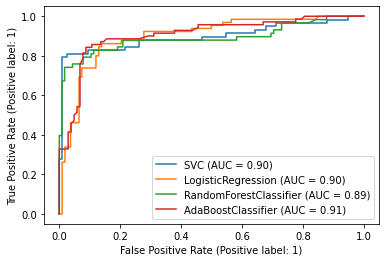

In [62]:
# we plot_roc_curve at testing score data
# let's plot roc curve check how much better performe

disp=plot_roc_curve(svm,x_tests,y_tests)
plot_roc_curve(lr,x_testl,y_testl,ax=disp.ax_)
plot_roc_curve(clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ad,x_testA,y_testA, ax=disp.ax_)
plt.show()

In [63]:
# SAVE THE MODEL 
import pickle

In [64]:
titanic_model= 'titanic_model.pickle'

pickle.dump(clf,open(titanic_model,'wb'))

In [ ]:
# 1. do analysis the dataset (use correlation, pairplot, distribution plot,scatterplot, barplot)
#2. checking skewness of continuous features
# 3. checkinh outliers and remove the outliers
# 4. take input_data, target_variable from dataset
# 5. scaling the input features
# do train_test_split the input & target_variabble
# train & test model over dataset
# do cross_valdation with ('gradientboosting', 'decisiontree', 'randomforest', 'svm')
# 9.  hyperparameter with GridSearchCV at 'GradienBoostin_' & 'Randomforest'
# . plot_roc_curve on test dataset 
# in last do save the model 